In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.spatial import distance as dist

In [2]:
for path in glob.glob("./data/*.jpg"):
    print(path)

./data\hulk.jpg
./data\ironman.jpg
./data\magneto.jpg
./data\spiderman.jpg
./data\venom.jpg
./data\wolverine.jpg
./data\wonderwoman.jpg
./data\wonderwoman2.jpg


In [3]:
for path in glob.glob("./data/*.jpg"):
    filename = path.split("\\")[-1].replace(".jpg", "")
    print(filename)

hulk
ironman
magneto
spiderman
venom
wolverine
wonderwoman
wonderwoman2


In [4]:
images = {}
for path in glob.glob("./data/*.*"):
    filename = path.split("\\")[-1].replace(".jpg", "")
    image = cv2.imread(path)
    images[filename] = image 
    print(filename)

hulk
ironman
magneto
spiderman
venom
wolverine
wonderwoman
wonderwoman2


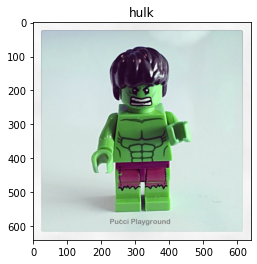

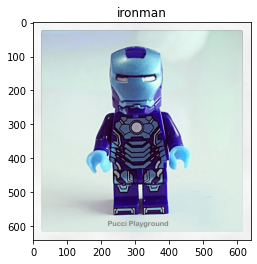

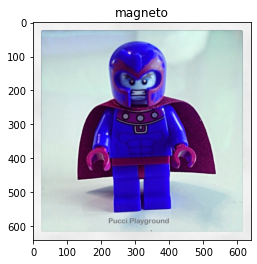

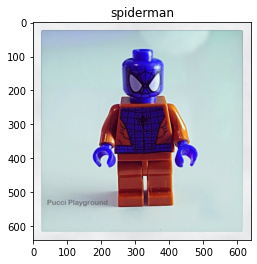

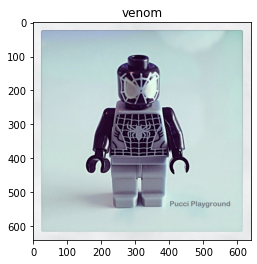

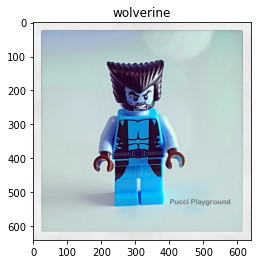

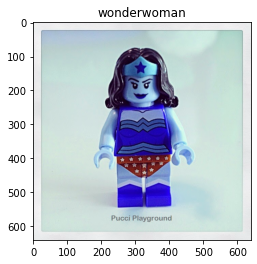

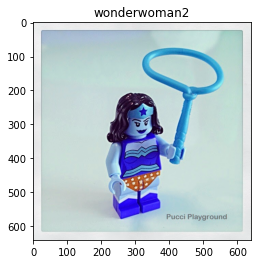

In [5]:
for k,v in images.items():
    plt.figure()
    plt.title(k)
    plt.imshow(v)

In [6]:
images["hulk"].shape

(640, 640, 3)

In [7]:
images = {}
for path in glob.glob("./data/*.*"):
    filename = path.split("\\")[-1].replace(".jpg", "")
    image = cv2.imread(path)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    print(filename)

hulk
ironman
magneto
spiderman
venom
wolverine
wonderwoman
wonderwoman2


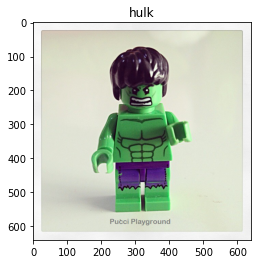

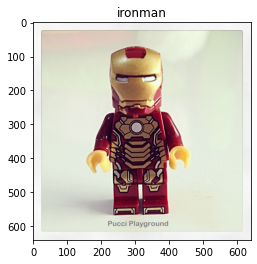

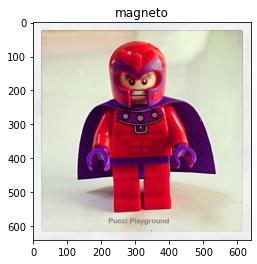

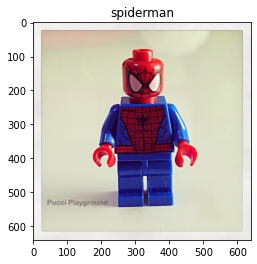

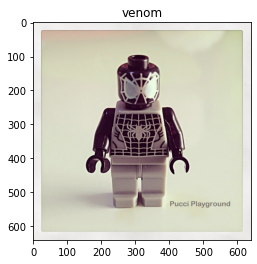

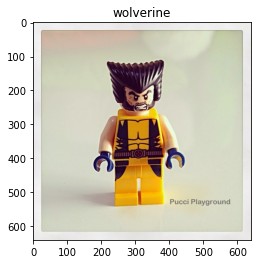

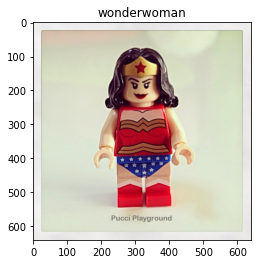

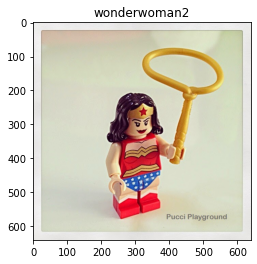

In [8]:
for k,v in images.items():
    plt.figure()
    plt.title(k)
    plt.imshow(v)

In [9]:
images["hulk"][:2,:2,:]

array([[[246, 246, 246],
        [244, 244, 244]],

       [[246, 246, 246],
        [246, 246, 246]]], dtype=uint8)

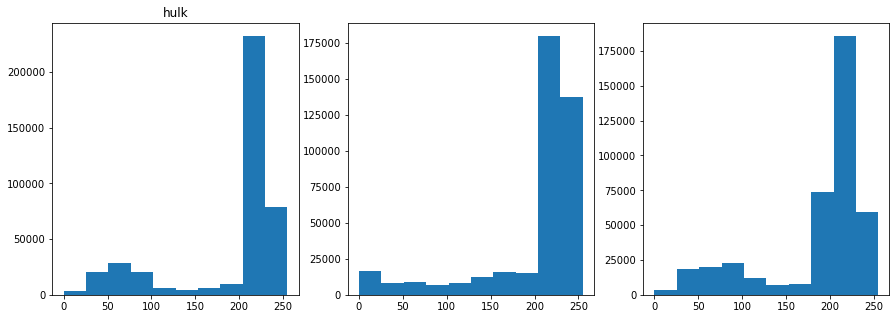

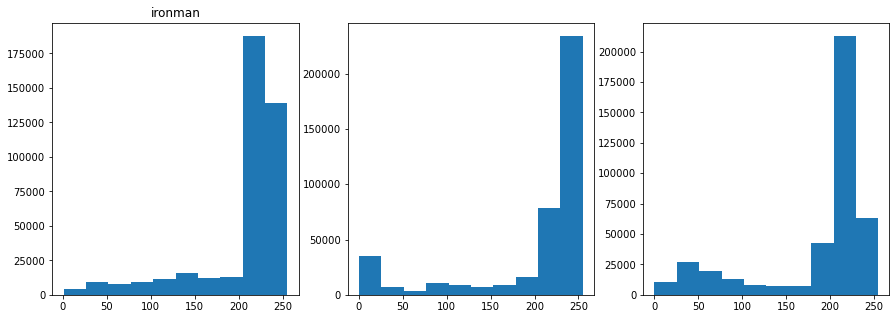

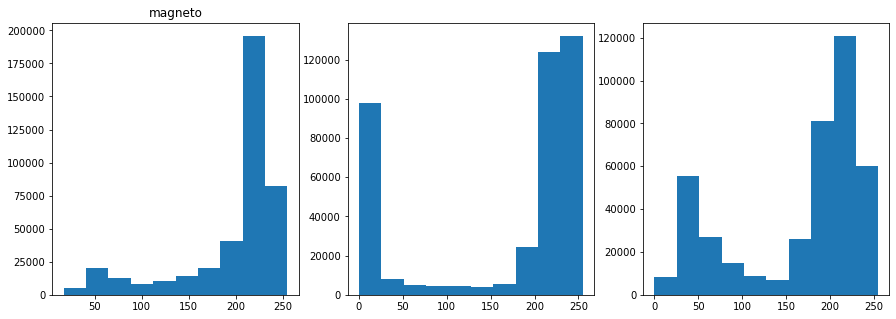

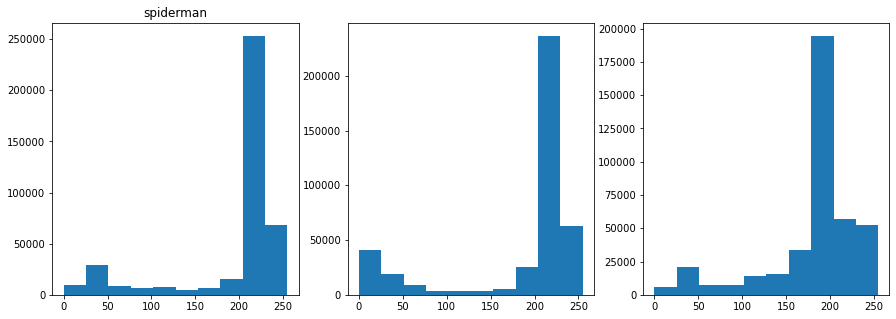

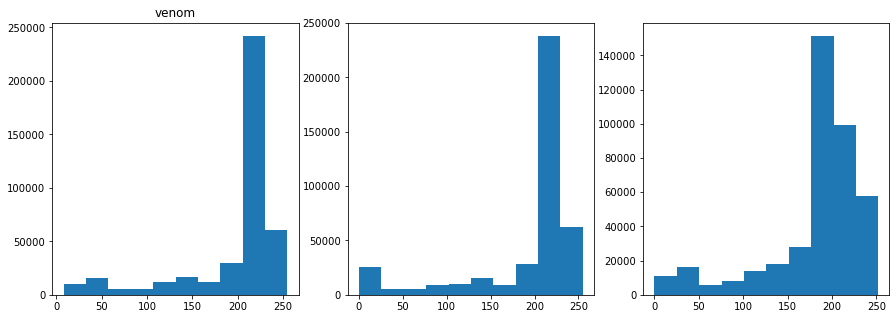

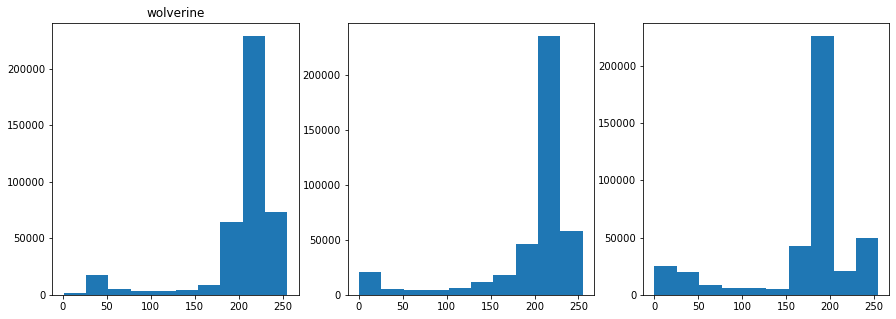

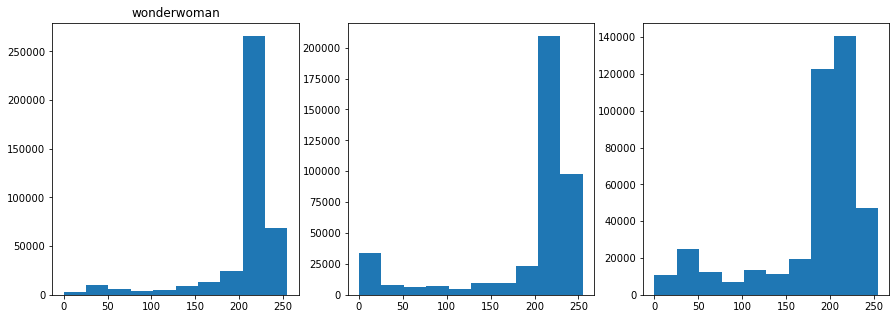

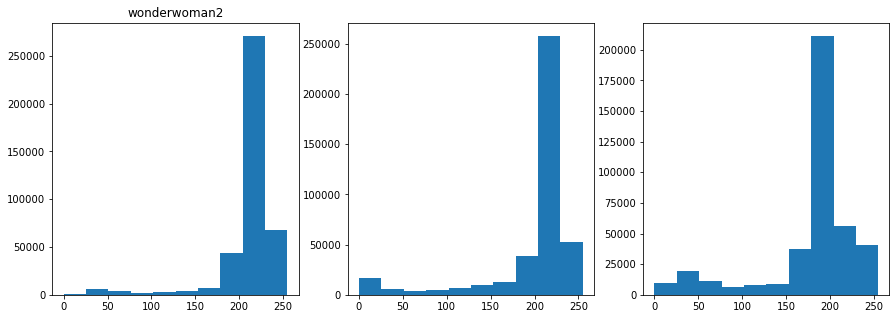

In [10]:
#Гистограмма распределения цвета по нашим героям

for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(131) #1 ряд 3 колонки 1(первое)
    ax1.hist(v[:,:,0].flatten()) #берем всю ширину, всю высоту и первый канал и при помощи flatten делаем из него плоский вектор
    ax1.set_title(k)
    ax2 = plt.subplot(132) 
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(133) 
    ax3.hist(v[:,:,2].flatten())

In [11]:
images = {}
indexes = {}
for path in glob.glob("./data/*.*"):
    filename = path.split("\\")[-1].replace(".jpg", "")
    image = cv2.imread(path)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    indexes[filename] = cv2.calcHist([images[filename]], [0,1,2], None, [8,8,8], [0,256,0,256,0,256]).flatten()
    print(filename)

hulk
ironman
magneto
spiderman
venom
wolverine
wonderwoman
wonderwoman2


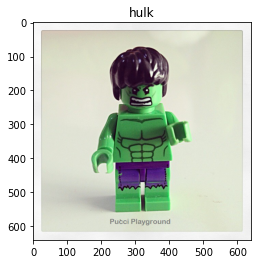

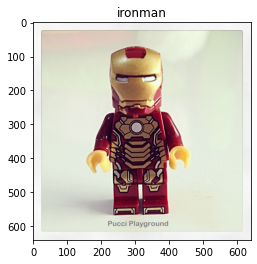

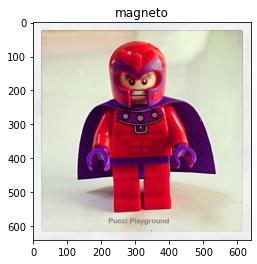

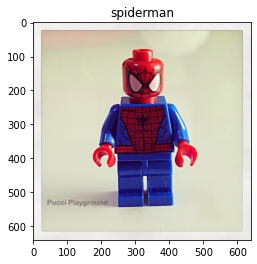

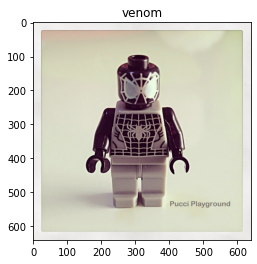

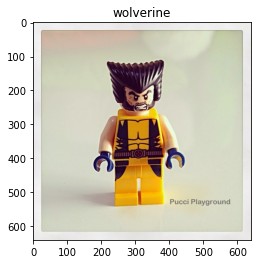

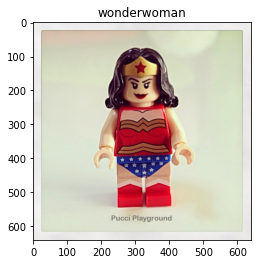

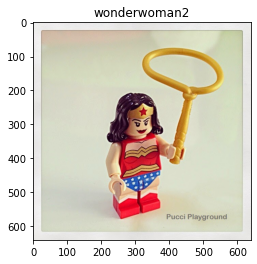

In [12]:
for k,v in images.items():
    plt.figure()
    plt.title(k)
    plt.imshow(v)

In [13]:
METHODS = (
    ("Euc", dist.euclidean), #Евклидовое растояние
    ("Taxi", dist.cityblock), #Манхэттенское расстояние
    ("Chebyshev", dist.chebyshev) #Растояние Чебышева
)

for name, method in METHODS:
    results = {}
    for k, v in indexes.items():
        d = method(indexes["wonderwoman2"],v)
        results[k] = d
    results = sorted([(v,k) for k,v in results.items()])
    print(name, method)

Euc <function euclidean at 0x000001F8FF4DFB70>
Taxi <function cityblock at 0x000001F8FF4E1048>
Chebyshev <function chebyshev at 0x000001F8FF4E1158>


In [14]:
print(results)

[(0.0, 'wonderwoman2'), (19744.0, 'wolverine'), (50962.0, 'spiderman'), (52568.0, 'venom'), (88165.0, 'wonderwoman'), (106284.0, 'magneto'), (124939.0, 'hulk'), (133115.0, 'ironman')]


In [15]:
images = {}
indexes = {}
for path in glob.glob("./data/*.*"):
    filename = path.split("\\")[-1].replace(".jpg", "")
    image = cv2.imread(path)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([images[filename]], [0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist)
    indexes[filename] = hist.flatten()
    print(filename)

hulk
ironman
magneto
spiderman
venom
wolverine
wonderwoman
wonderwoman2


In [16]:
print(indexes["hulk"])

[1.44046508e-02 2.68694037e-03 1.20490595e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.06393192e-02 1.81940803e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.31944397e-03 2.29534577e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.03679465e-05 6.86796382e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.00035996e-04 6.02452965e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.63924758e-05 1.26515122e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.61471793e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.54256747e-03 6.203458

In [17]:
print(indexes["hulk"].sum())

2.4676476


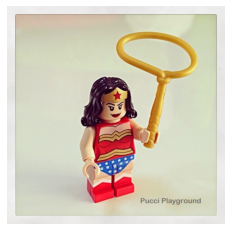

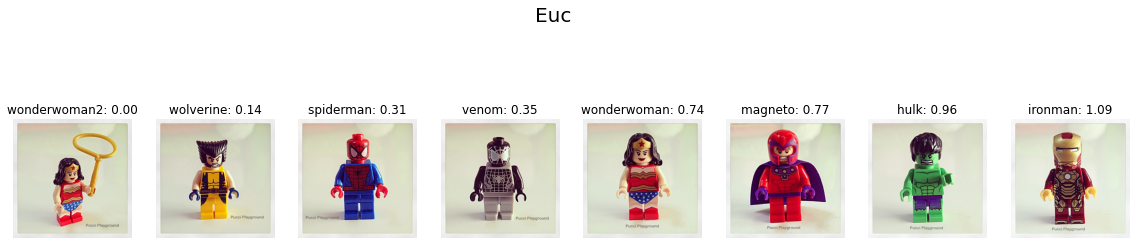

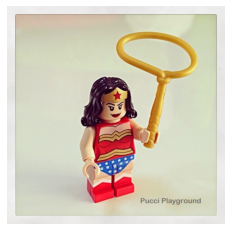

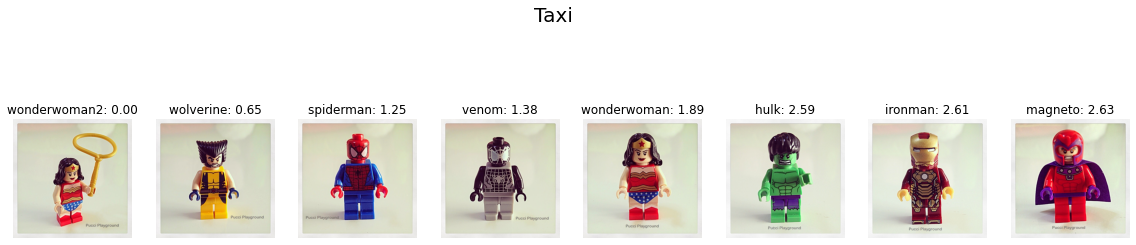

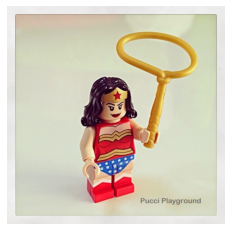

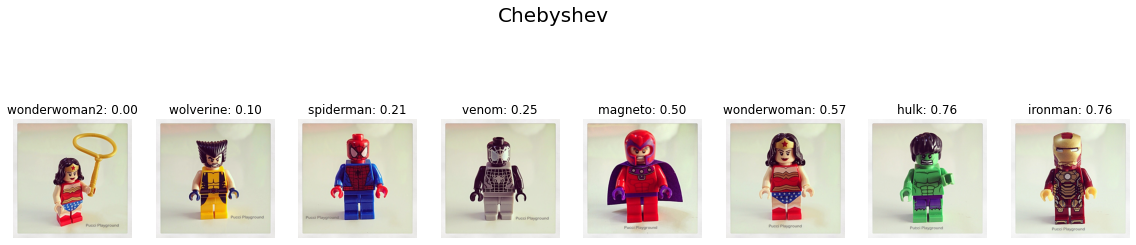

In [18]:
METHODS = (
    ("Euc", dist.euclidean), #Евклидовое растояние
    ("Taxi", dist.cityblock), #Манхэттенское расстояние
    ("Chebyshev", dist.chebyshev) #Растояние Чебышева
)

for name, method in METHODS:
    results = {}
    for k, v in indexes.items():
        d = method(indexes["wonderwoman2"],v)
        results[k] = d
    results = sorted([(v,k) for k,v in results.items()])
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.imshow(images["wonderwoman2"])
    plt.axis("off")
    fig = plt.figure("Res: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize=20)
    for (i,(k,v)) in enumerate(results):
        ax = fig.add_subplot(1, len(images), i+1)
        ax.set_title("%s: %.2f" % (v,float(k)))
        plt.imshow(images[v])
        plt.axis("off")
    #print(results)
plt.show()

## Homework

In [19]:
from sklearn.cluster import KMeans, SpectralClustering

In [20]:
# Read the image
img = cv2.imread('./data/hulk.jpg')
img_size = img.shape

In [21]:
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
X.shape

(409600, 3)

In [22]:
# Run the Kmeans algorithm
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

In [23]:
# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

In [24]:
# Reshape X_recovered to have the same dimension as the original image 640 * 640 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

In [25]:
X_compressed.shape

(640, 640, 3)

In [26]:
img.shape

(640, 640, 3)

In [27]:
km2 = KMeans(n_clusters=2)
km2.fit(X)

KMeans(n_clusters=2)

In [28]:
X2_compressed = km2.cluster_centers_[km2.labels_]
X2_compressed = np.clip(X2_compressed.astype('uint8'), 0, 255)

In [29]:
X2_compressed = X2_compressed.reshape(img_size[0], img_size[1], img_size[2])

In [30]:
km3 = KMeans(n_clusters=10)
km3.fit(X)

KMeans(n_clusters=10)

In [31]:
X3_compressed = km3.cluster_centers_[km3.labels_]
X3_compressed = np.clip(X3_compressed.astype('uint8'), 0, 255)

In [32]:
X3_compressed = X3_compressed.reshape(img_size[0], img_size[1], img_size[2])

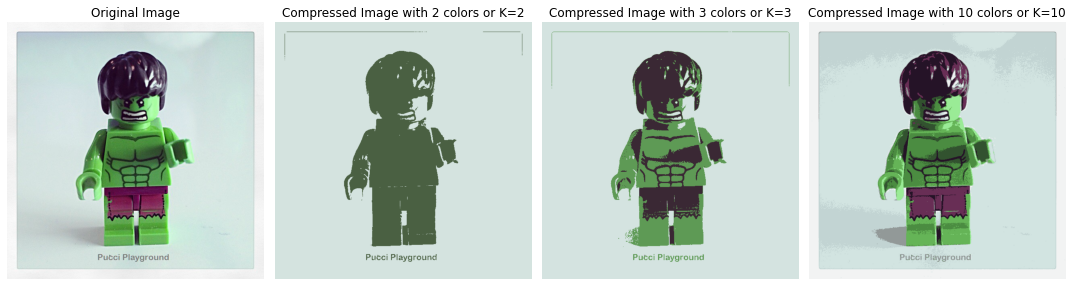

In [33]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 4, figsize = (15, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image', fontsize = 12)
ax[1].imshow(X2_compressed)
ax[1].set_title('Compressed Image with 2 colors or K=2', fontsize = 12)
ax[2].imshow(X_compressed)
ax[2].set_title('Compressed Image with 3 colors or K=3', fontsize = 12)
ax[3].imshow(X3_compressed)
ax[3].set_title('Compressed Image with 10 colors or K=10', fontsize = 12)
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();